<a href="https://colab.research.google.com/github/humairoh22/Huma/blob/main/Marketing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi! I am Humairoh. This is my first portfolio to do EDA with a topic about marketing campaign using Python. This dataset is from kaggle and consists of 28 columns with detail:

*  ID: Customer's Unique Identifier
*  Year_Birth: Customer's Birth Year
*  Education: Customer's education level
*  Marital_Status: Customer's marital status
*  Income: Customer's yearly household income
*  Kidhome: Number of children in customer's household
*  Teenhome: Number of teenagers in customer's household
*  Dt_Customer: Date of customer's enrollment with the company
*  Recency: Number of days since customer's last purchase
*  MntWines: Amount spent on wine in the last 2 years
*  MntFruits: Amount spent on fruits in the last 2 years
*  MntMeatProducts: Amount spent on meat in the last 2 years
*  MntFishProducts: Amount spent on fish in the last 2 years
*  MntSweetProducts: Amount spent on sweets in the last 2 years
*  MntGoldProds: Amount spent on gold in the last 2 years
*  NumDealsPurchases: Number of purchases made with a discount
*  NumWebPurchases: Number of purchases made through the company's web site
*  NumCatalogPurchases: Number of purchases made using a catalogue
*  NumStorePurchases: Number of purchases made directly in stores
*  NumWebVisitsMonth: Number of visits to company's web site in the last month
*  AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)
*  AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)
*  AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)
*  AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)
*  AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)
*  Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)
*  Complain: 1 if customer complained in the last 2 years, 0 otherwise
*  Country: Customer's location


# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preparation And Cleaning


1.   Read the dataset using pandas.
2.   Look some information about the data and try to figure out some missing value.

In [2]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/marketing_data.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


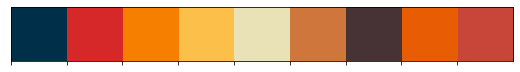

In [3]:
#set theme colors
colors= ['#003049', '#d62828', '#f77f00', '#fcbf49', '#eae2b7', '#ce763b', '#473335', '#e85d04','#c84639']
sns.palplot(colors)


In [4]:
#check how many rows and column in the dataset
df.shape

(2240, 28)

In [5]:
#Check the dataset to know specific information for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

From the information above, we found a space in column of Income and the  data type of Income also is not appropiate as well as Dt_Customer. So, for a better analysis we should fix our dataset. 

**Data Cleaning**

In [6]:
#delete space in column of Income
df.rename(columns = {' Income ':'Income'}, inplace = True)


In [7]:
#replace data type of Dt_Customer from object to date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

In [8]:
#replace data type of Income from object to float

df['Income'] = df['Income'].str.replace('$', '') #remove string 
df['Income'] = df['Income'].str.replace(',', '')
df = df.astype({'Income':float})
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US


In [9]:
#change year birth to age
from datetime import date
today = pd.to_datetime('today')
df['Age'] = (today.year - df['Year_Birth'])

In [10]:
#rename Marital_status column with Relationship_Status
df.rename (columns= {'Marital_Status' : 'Relationship_Status'}, inplace = True);
df.head()

,ID,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,52
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,61
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,64
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,55
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,33


In [11]:
#check unique value in Education column
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [12]:
#Insert 2n cycle to masters
df['Education'] = df['Education'].replace(['2n Cycle', 'Master'], 'Master')

# Grouping Data

In [13]:
df['Relationship_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [14]:
#Grouping Relationship_status value
df['Relationship_Status'] = df['Relationship_Status'].replace(['Divorced', 'Widow', 'YOLO', 'Alone', 'Absurd'], 'Single')
df['Relationship_Status'] = df['Relationship_Status'].replace(['Married', 'Together'], 'Couple')
df.head(3)

,ID,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Single,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,52
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,61
2,10476,1958,Graduation,Couple,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,64


In [15]:
#Grouping Data
df['Children'] = df['Kidhome'] + df['Teenhome']
df['TotalMntProducts'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['TotalNumPurchases'] = df['NumWebPurchases']+df['NumStorePurchases']+df['NumCatalogPurchases']

# Choose Data To Explore

In [16]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Relationship_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Children',
       'TotalMntProducts', 'TotalNumPurchases'],
      dtype='object')

In [17]:
#Choose data that we want to explore
data_df = df[['Education', 'Age', 'Relationship_Status', 'Income', 'Children', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'TotalMntProducts', 'TotalNumPurchases']]
data_df.head(5)

,Education,Age,Relationship_Status,Income,Children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalMntProducts,TotalNumPurchases
0,Graduation,52,Single,84835.0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,14
1,Graduation,61,Single,57091.0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,17
2,Graduation,64,Couple,67267.0,1,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,10
3,Graduation,55,Couple,32474.0,2,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,3
4,Graduation,33,Single,21474.0,1,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,6


In [18]:
data_df.describe()

,Age,Income,Children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,TotalMntProducts,TotalNumPurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,53.194196,52247.251354,0.950446,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,605.798214,12.537054
std,11.984069,25173.076661,0.751803,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,602.249288,7.205741
min,26.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,45.000000,35303.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,6.000000
50%,52.000000,51381.500000,1.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,12.000000
75%,63.000000,68522.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.500000,18.000000
max,129.000000,666666.000000,3.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,32.000000


From information above, there is something unusual with customer age which the maximum age of customers is 129. So, we gonna analysis further to know whether it is an outlier or not.

# Detect And Remove Outliers 

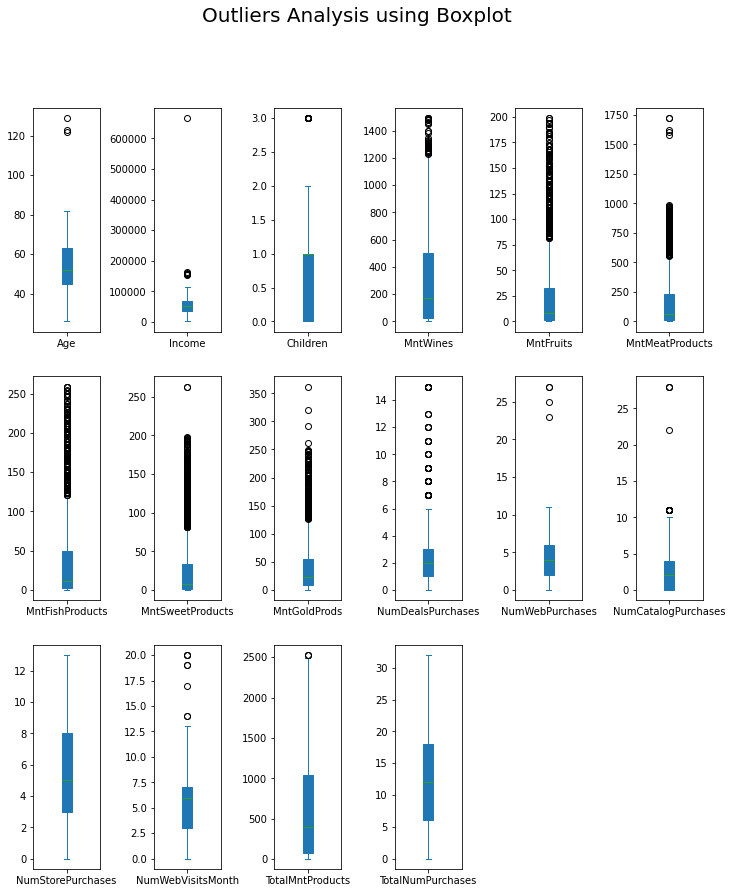

In [19]:
df_to_plot = data_df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

df_to_plot.plot(subplots=True, layout=(3,6), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Outliers Analysis using Boxplot', fontsize = 20)
plt.subplots_adjust(wspace=0.8)



*   From the boxplot of Age, we found that there are customers who live more than 100 years old which means it's a rare happen for human can live over 100 years old in this century. However, the boxplot shows that mostly age of customers are from 20s - 80s years old.
*   In the boxplot of Income above shows that there is customer who has yearly income for more than 600.000 USD. But, mostly they have income less than 200.0000 USD.



In [20]:
#Remove Outliers in Age column
data_df.drop(data_df.index[data_df['Age'] > 100], inplace = True)
#data_df = data_df[data_df['Age'] > 100].reset_index(drop = True)
#dataset = data_df.drop(data_df[data_df['Age']>100].index).reset_index(drop=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
#Remove outliers in Income
data_df.drop(data_df[data_df.Income > (68522 + (1.5* (68522-35303)))].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


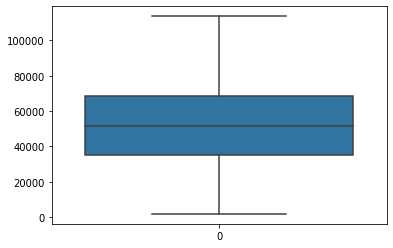

In [22]:
sns.boxplot(data=data_df['Income'])

There is no outliers in income column.

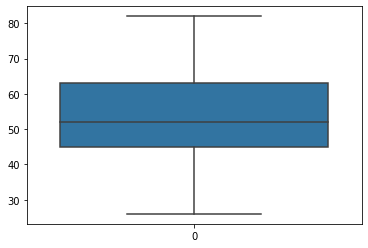

In [23]:
sns.boxplot(data=data_df['Age'])


There is no outliers in age column.

In [24]:
data_df.shape

(2229, 26)

Now, our dataset have 2229 rows and 26 columns

**Find Null Values**

In [25]:
data_df.isnull().sum()

Education               0
Age                     0
Relationship_Status     0
Income                 24
Children                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
TotalMntProducts        0
TotalNumPurchases       0
dtype: int64

As you can see, column of Income has 24 missing values. So, in this case we need to fill that missing value with mean of income customers.

In [26]:
data_df['Income'].fillna(data_df['Income'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
data_df.isnull().sum()

Education              0
Age                    0
Relationship_Status    0
Income                 0
Children               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
TotalMntProducts       0
TotalNumPurchases      0
dtype: int64

All of columns don't have missing values now.

# Ask Questions Related To The Dataset

*  What is the majority of the customers' educational background?
*  Is the educational background of someone affect on their income?
*  Does someone who already has children purchase more than someone who don't have children?
*  How's performance of each channel? and Which channel is less performance?
*  Which country has the highest number of customers? and which country purchase the most?
*  Which Campaign is more succesfull in attracting customers? 



# Visualizations

**Total Number of customers based on their educational background**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


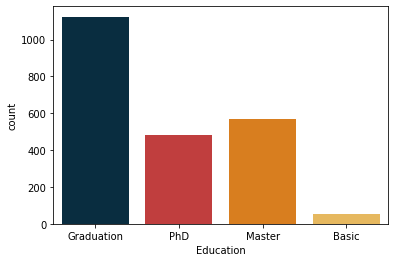

In [28]:
sns.countplot(data_df['Education'], palette= colors)

Based on graph above, a lot of consumers have a graduation degree as their educational background.

**Income of customers vs their educational background**

Text(0, 0.5, 'Education')

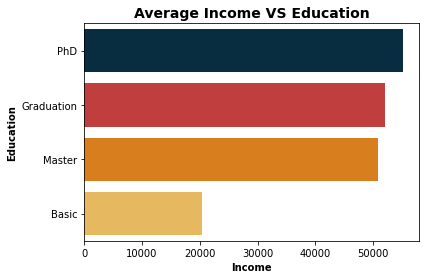

In [29]:
plot_order = data_df.groupby('Education')['Income'].agg('mean').reset_index()
plot_order1= plot_order.sort_values(by='Income', ascending=False)

#create bar chart
ax = sns.barplot(data=plot_order1, y = 'Education', x = 'Income', ci=None, orient='h', palette = colors )
plt.title('Average Income VS Education', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=10, fontweight='bold')
plt.ylabel('Education', fontsize=10, fontweight='bold')




According to the chart above, the customer with a **PhD** has a greater average income than the other. Graduation, Master, and Basic are the next steps. So, from insight that we get, customers educational degree doesn't affect on their income.


**Number of customers relationship status**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


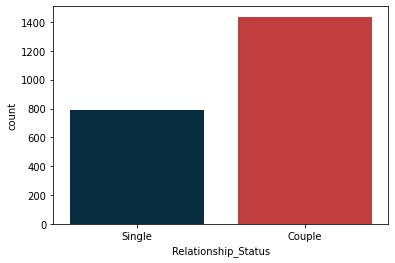

In [30]:
sns.countplot(data_df['Relationship_Status'], palette=colors)


**Number of purchase based on customer who have children and don't.**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Text(0.5, 6.79999999999999, 'Parents')

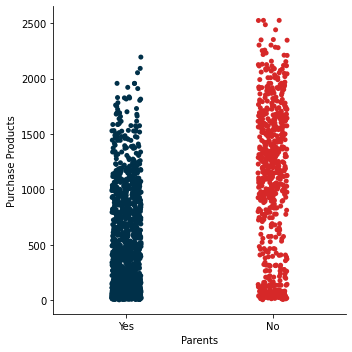

In [31]:
data_df.loc[data_df['Children'] > 0, 'HasChildren']='Yes'
data_df.loc[data_df['Children'] == 0, 'HasChildren']='No'

sns.catplot(x='HasChildren', y= 'TotalMntProducts', order=['Yes', 'No'], palette=colors, data=data_df)
plt.ylabel('Purchase Products')
plt.xlabel('Parents')

Surprisingly, customers who dont have children actually spend more than customers who do.

**Performance each channels**

In [32]:
TotalPurchase = sum([data_df['NumStorePurchases'].sum(), data_df['NumWebPurchases'].sum(), data_df['NumCatalogPurchases'].sum()])
TotalNumPurchase = TotalPurchase/100
ChannelsRatio = [((data_df['NumStorePurchases'].sum()), (data_df['NumWebPurchases'].sum()), (data_df['NumCatalogPurchases'].sum()))/TotalNumPurchase]
ChannelsRatio

[array([46.31774632, 32.67195767, 21.01029601])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


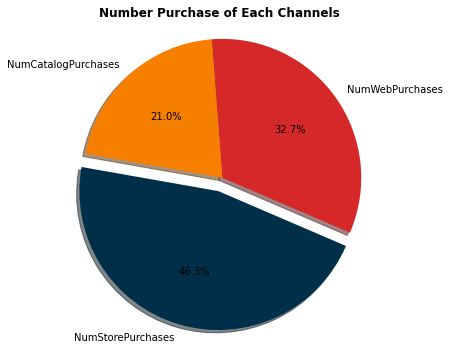

In [33]:
plt.figure(figsize = (6, 6))
explode = (0.1, 0, 0) #creating explode data
plt.pie(ChannelsRatio, labels= ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases'], 
        explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=170)
plt.title('Number Purchase of Each Channels', fontweight='bold')
plt.axis('equal')
plt.show()

Catalog is one of channels with a lowest performance. A lot of customers prefer to buy things at a store. 

**Number of customers based on their origin**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


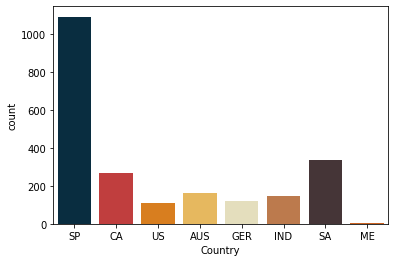

In [34]:
sns.countplot(data_df['Country'], palette=colors)

Text(0.5, 1.0, 'Total Purchase')

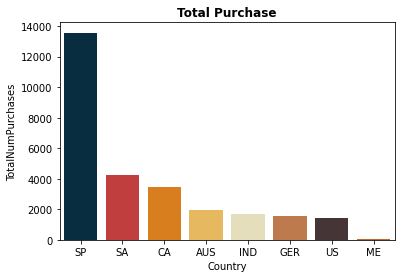

In [35]:
Purchase = data_df.groupby('Country')['TotalNumPurchases'].agg('sum').reset_index()
Purchase1 = Purchase.sort_values(by='TotalNumPurchases', ascending=False)

sns.barplot(data=Purchase1, x='Country', y='TotalNumPurchases', palette=colors)
plt.title('Total Purchase', fontweight='bold')

Mostly of all customers are from Spain. They are also the country with the biggest number of purchases compared to other countries.

**Succeed Campaign**

In [36]:
AccepetedCampaign = pd.DataFrame(data_df.iloc[:,16:21].sum(), columns=['Amount']).reset_index()
AccepetedCampaign

,index,Amount
0,AcceptedCmp3,163
1,AcceptedCmp4,167
2,AcceptedCmp5,162
3,AcceptedCmp1,144
4,AcceptedCmp2,30


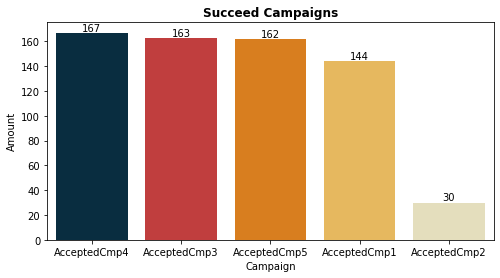

In [37]:
plt.figure(figsize=(8, 4))
chart = sns.barplot(data=AccepetedCampaign.sort_values(by='Amount',ascending=False), x='index', y='Amount', palette=colors)
plt.title('Succeed Campaigns', fontweight='bold')
plt.xlabel('Campaign')

for p in chart.patches: #create data label
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

It is clear from the information above that campaign 4 is the most successful of all campaigns that have been conducted.  